In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
from sklearn.svm import SVC
import pickle

## Carga de datos train

In [2]:
df = pd.read_csv("../data/train/train.csv")
df.head()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,4.862270,2.471408,0,0,9.788456,0
1,28.316033,5.021810,0,0,2.873132,0
2,27.204428,3.819500,1,0,2.150132,0
3,6.177355,0.036686,0,0,2.570051,1
4,6.847389,9.246352,1,0,1.814942,1


## Definir X, y

In [3]:
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

## Entrenamiento de modelos

### Prueba con SVC y GridSearch

In [ ]:
svc = SVC(random_state=11, probability=True) # SVC random state 11 y probability True para poder calcular el predict proba
parametros = {"C":[3,5,7,9], "kernel": ["linear","poly", "rbf"], "degree": [2,3,4]} # parámetros para pasar en el GridSearch

gs_svc = GridSearchCV(estimator=svc, param_grid=parametros, scoring="recall", cv=3, verbose=3, n_jobs=-1)
gs_svc.fit(X_train,y_train) # entrenamiento con los parámetros establecidos en el GS con scoring en recall y 3 CV

print("Mejor estimator:", gs_svc.best_estimator_) # Mejor combinación
print("Mejor parametro:", gs_svc.best_params_) # Mejores parámetros
print("Mejor recall:", gs_svc.best_score_) # Mejor resultado de recall

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejor estimator: SVC(C=9, degree=4, kernel='poly', probability=True, random_state=11)
Mejor parametro: {'C': 9, 'degree': 4, 'kernel': 'poly'}
Mejor recall: 0.7821782178217823


## Carga de datos test

In [5]:
df_test = pd.read_csv("../data/test/test.csv")

In [6]:
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

In [ ]:
pred_svc = gs_svc.best_estimator_.predict(X_test) # predicción con la parte test
scores = gs_svc.best_estimator_.predict_proba(X_test)[:,1] # guardamos en scores el predict proba para sacar el AUC

print("Recall:", recall_score(y_test, pred_svc)) # vemos el resultado de recall
print("Accuracy:", accuracy_score(y_test, pred_svc)) # resultado de accuracy
print("AUC:", roc_auc_score(y_test, scores)) # resultado de roc_auc
print("CM:", confusion_matrix(y_test, pred_svc)) # Vemos la matriz de confusión
print("Report:", classification_report(y_test, pred_svc)) # Sacamos el reporte completo

Recall: 0.8961038961038961
Accuracy: 0.8302325581395349
AUC: 0.914549218897045
CM: [[219  57]
 [ 16 138]]
Report:               precision    recall  f1-score   support

           0       0.93      0.79      0.86       276
           1       0.71      0.90      0.79       154

    accuracy                           0.83       430
   macro avg       0.82      0.84      0.82       430
weighted avg       0.85      0.83      0.83       430



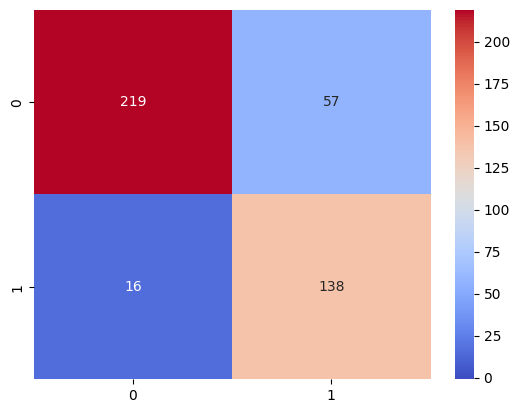

In [8]:
# Mapa de calor de la matriz de confusión para comprenderla mejor

sns.heatmap(confusion_matrix(y_test, pred_svc), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Guardado de modelo con pickle

In [ ]:
pickle.dump(gs_svc.best_estimator_, open("../models/modelos_probados/03_modelo_svc.pkl", "wb"))